In [2]:
# import libraries
import os,sys

# Get 
current_dir=os.getcwd()
print(current_dir)

#Get the parent directory
parent_dir=os.path.dirname(current_dir)
print(parent_dir)

#Insert the path to the parent directory
sys.path.insert(0,parent_dir)

c:\Users\pc\Desktop\week 10\project_week_10\notebooks
c:\Users\pc\Desktop\week 10\project_week_10


In [3]:
#import libraries
import pandas as pd
import numpy as np

# import functions/class
from scripts.load_data import read_csv_file
from scripts.plot import plot_data,cusum_method
from scripts.data_scraper import fetch_world_bank_data,fetch_iea_data,fetch_brent_prices,fetch_geopolitical_risk
#from scripts.data_scraper import fetch_world_bank_data,fetch_brent_oil_prices,fetch_geopolitical_risk_index
#from scripts.data_scraper import fetch_iea_reports,fetch_imf_data
#from scripts.data_scraper import fetch_brent_oil_prices
from scripts.EDA import handle_missing_values,summarize_data,correlation_analysis,standard_scaling
from scripts.plot import plot_time_series,plot_correlation_heatmap,rolling_average,detect_outliers

ModuleNotFoundError: No module named 'scripts.load_data'

In [13]:
# Load the dataset
os.chdir('../scripts')
file_path='../data/BrentOilPrices.csv'
df=read_csv_file(file_path)
df.head(5)

Dataset loaded successfully from ../data/BrentOilPrices.csv


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [15]:
df['Date']  = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values(by='Date')
df.head

<bound method NDFrame.head of            Date  Price
0    1987-05-20  18.63
1    1987-05-21  18.45
2    1987-05-22  18.55
3    1987-05-25  18.60
4    1987-05-26  18.63
...         ...    ...
9006 2022-11-08  96.85
9007 2022-11-09  93.05
9008 2022-11-10  94.25
9009 2022-11-11  96.37
9010 2022-11-14  93.59

[9011 rows x 2 columns]>

# Feature Engineering

In [16]:
# Create new columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [17]:
# Or, to get month names:
#df['MonthName'] = df['Date'].dt.strftime('%B')  # Full month name (e.g., January)
df['MonthAbbr'] = df['Date'].dt.strftime('%b')  # Abbreviated month name (e.g., Jan)
df

,Date,Price,Year,Month,Day,MonthAbbr
0,1987-05-20,18.63,1987,5,20,May
1,1987-05-21,18.45,1987,5,21,May
2,1987-05-22,18.55,1987,5,22,May
3,1987-05-25,18.60,1987,5,25,May
4,1987-05-26,18.63,1987,5,26,May
...,...,...,...,...,...,...
9006,2022-11-08,96.85,2022,11,8,Nov
9007,2022-11-09,93.05,2022,11,9,Nov
9008,2022-11-10,94.25,2022,11,10,Nov
9009,2022-11-11,96.37,2022,11,11,Nov


# EDA

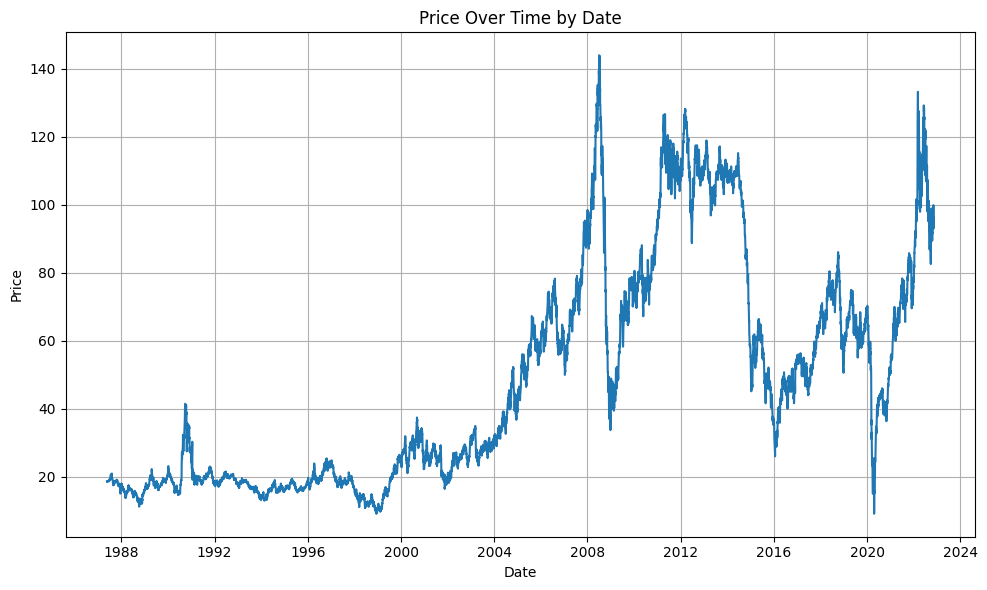

<Axes: >

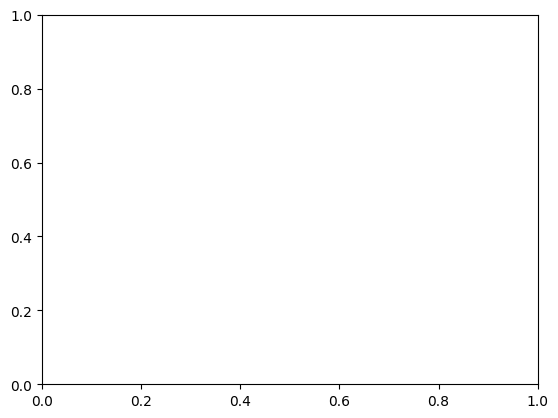

In [18]:
# Line plot of Sales vs. Date
plot_data(df, x_col='Date', y_cols='Price', title='Price Over Time by Date', xlabel='Date', ylabel='Price')

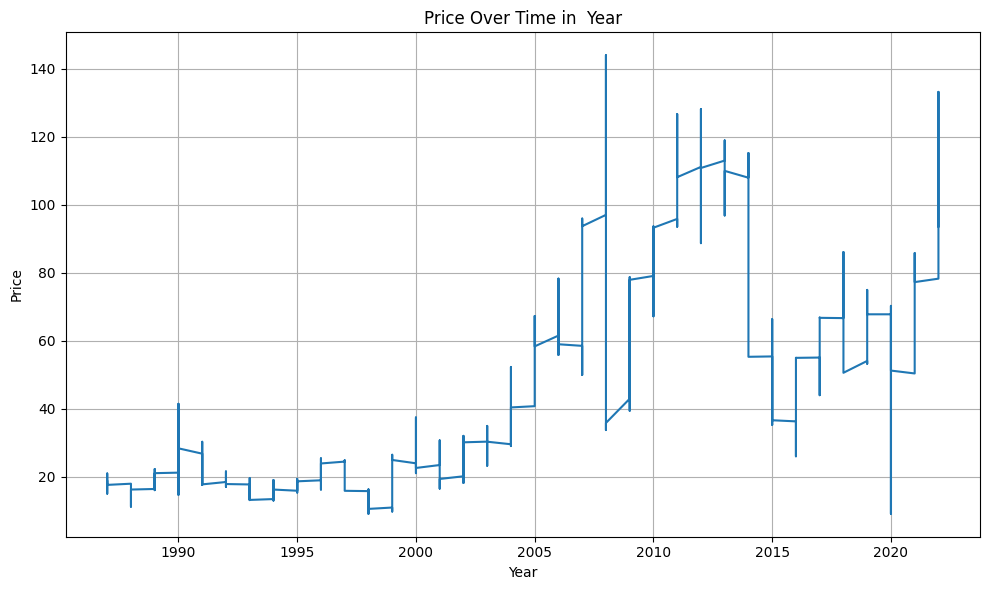

<Axes: >

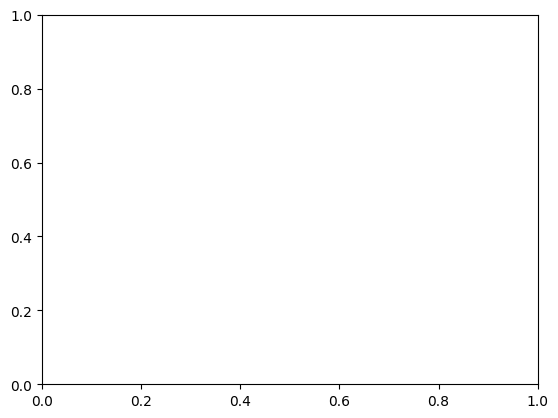

In [19]:
# Line plot of Sales vs. Date
plot_data(df, x_col='Year', y_cols='Price', title='Price Over Time in  Year', xlabel='Year', ylabel='Price')

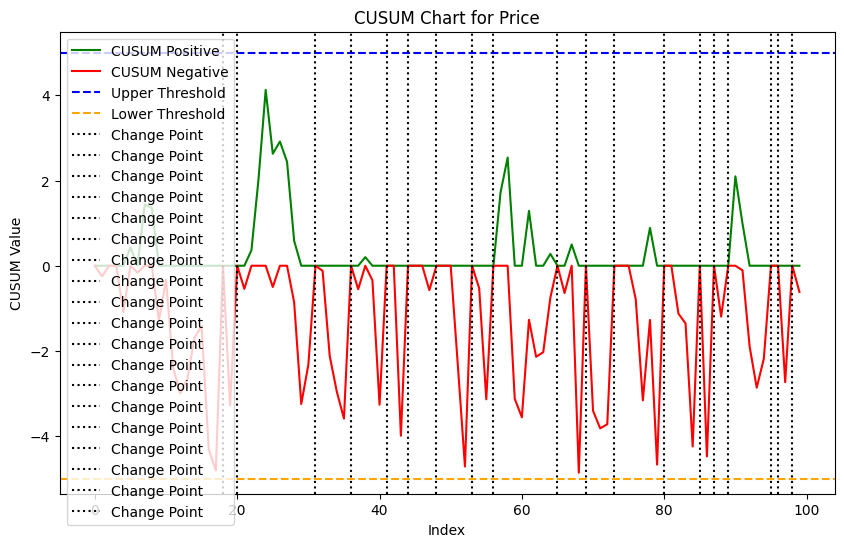

Detected Change Points: [18, 20, 31, 36, 41, 44, 48, 53, 56, 65, 69, 73, 80, 85, 87, 89, 95, 96, 98]


In [20]:
df = pd.DataFrame({'Price': np.random.normal(10, 2, 100)})
change_points = cusum_method(df['Price'], k=0.5, h=5, title="CUSUM Chart for Price")
print("Detected Change Points:", change_points)

# World Bank, IMF, IEA, and industry reports Data collection

In [14]:
"""
# ------------------ Execute Data Collection ------------------
if __name__ == "__main__":
    print("🔄 Fetching Brent Oil Prices...")
    fetch_brent_oil_prices()

    print("🔄 Fetching GDP Data from World Bank...")
    fetch_world_bank_data(indicator="NY.GDP.MKTP.CD")  # GDP Data

    print("🔄 Fetching Inflation Data from World Bank...")
    fetch_world_bank_data(indicator="FP.CPI.TOTL.ZG")  # Inflation Data

    print("🔄 Fetching Oil Rents Data from World Bank...")
    fetch_world_bank_data(indicator="NY.GDP.PETR.RT.ZS")  # Oil Rents (% of GDP)

    print("🔄 Fetching IMF Economic Data...")
    fetch_imf_data()

    print("🔄 Fetching Geopolitical Risk Index...")
    fetch_geopolitical_risk_index()

    print("🔄 Fetching IEA Technology Reports...")
    fetch_iea_reports()

    print("\n✅ All datasets successfully fetched and saved.")
    """

'\n# ------------------ Execute Data Collection ------------------\nif __name__ == "__main__":\n    print("🔄 Fetching Brent Oil Prices...")\n    fetch_brent_oil_prices()\n\n    print("🔄 Fetching GDP Data from World Bank...")\n    fetch_world_bank_data(indicator="NY.GDP.MKTP.CD")  # GDP Data\n\n    print("🔄 Fetching Inflation Data from World Bank...")\n    fetch_world_bank_data(indicator="FP.CPI.TOTL.ZG")  # Inflation Data\n\n    print("🔄 Fetching Oil Rents Data from World Bank...")\n    fetch_world_bank_data(indicator="NY.GDP.PETR.RT.ZS")  # Oil Rents (% of GDP)\n\n    print("🔄 Fetching IMF Economic Data...")\n    fetch_imf_data()\n\n    print("🔄 Fetching Geopolitical Risk Index...")\n    fetch_geopolitical_risk_index()\n\n    print("🔄 Fetching IEA Technology Reports...")\n    fetch_iea_reports()\n\n    print("\n✅ All datasets successfully fetched and saved.")\n    '

In [18]:
# Example: Fetch GDP data for US, UK, and China
df_gdp = fetch_world_bank_data("NY.GDP.MKTP.CD", ["US", "GB", "CN"])

# Save to CSV only if data exists
if df_gdp is not None and not df_gdp.empty:
    df_gdp.to_csv("world_bank_gdp.csv", index=False)
    print("✅ GDP data successfully saved to world_bank_gdp.csv")
    print(df_gdp.head())
else:
    print("❌ No data to save.")

❌ Failed to fetch World Bank data (NY.GDP.MKTP.CD)
❌ No data to save.


In [6]:
# Example: Fetch latest energy technology reports
iea_reports = fetch_iea_data()
pd.DataFrame(iea_reports, columns=["IEA Report"]).to_csv("iea_reports.csv", index=False)

In [27]:
# Example: Fetch recent geopolitical risk data
gpr_summary = fetch_geopolitical_risk()
with open("geopolitical_risk.txt", "w") as f:
    f.write(gpr_summary)

In [19]:
# Example: Fetch oil prices
df_oil = fetch_brent_prices()

[*********************100%***********************]  1 of 1 completed


In [20]:
# ------------------------------
# ✅ Summary: Collected Data
# ------------------------------
print("✅ Data collection complete!")
#print(f"World Bank GDP Data:\n{df_gdp.head()}")
print(f"IEA Reports: {iea_reports[:5]}")
#print(f"Recent Geopolitical Risk Summary: {gpr_summary[:200]}...")
print(f"Brent Oil Prices:\n{df_oil.head()}")

✅ Data collection complete!
IEA Reports: []
Brent Oil Prices:
Price         Close     High      Low     Open  Volume
Ticker          BOP      BOP      BOP      BOP     BOP
Date                                                  
2005-11-09  3.71403  3.71403  3.71403  3.71403  549914
2005-11-10  3.71403  3.71403  3.71403  3.71403       0
2005-11-11  5.75000  5.75000  5.75000  5.75000       0
2005-11-14  3.35878  3.35878  3.35878  3.35878  412900
2005-11-15  3.35878  3.35878  3.35878  3.35878       0


In [26]:
# Load the dataset
os.chdir('../scripts')
file_path='../notebooks/brent_oil_prices.csv'
df1=read_csv_file(file_path)

Dataset loaded successfully from ../notebooks/brent_oil_prices.csv


In [ ]:
df1=handle_missing_values(df1)

Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64

In [29]:
df1.dropna(inplace=True)
df1.isnull().sum()

Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [30]:
# Summarize Data
summarize_data(df1)


📊 Summary Statistics:
          Price Close              High               Low                Open  \
count     3849  3849              3849              3849                3849   
unique    3849   891               907               882                 885   
top     Ticker   2.0  2.53302001953125  2.53302001953125  1.8408700227737427   
freq         1    81                81                81                 167   

       Volume  
count    3849  
unique   3073  
top         0  
freq      590  

🛠 Data Info:

<class 'pandas.core.frame.DataFrame'>
Index: 3849 entries, 0 to 3849
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   3849 non-null   object
 1   Close   3849 non-null   object
 2   High    3849 non-null   object
 3   Low     3849 non-null   object
 4   Open    3849 non-null   object
 5   Volume  3849 non-null   object
dtypes: object(6)
memory usage: 210.5+ KB
None


In [5]:
df1.columns

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

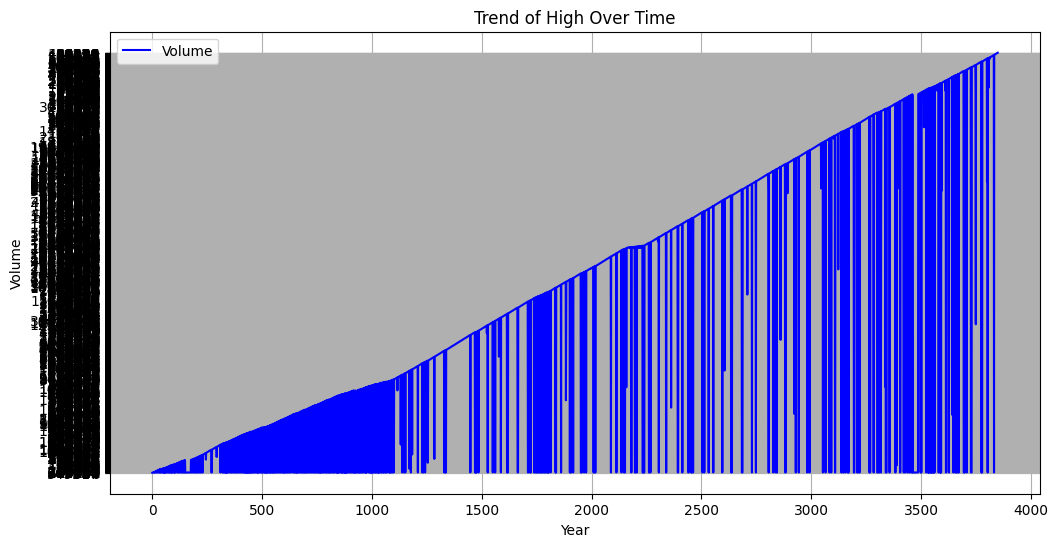

In [35]:
# Visualize Time Series Data
plot_time_series(df1, "Volume", "Trend of High Over Time")

In [42]:
! pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Perform correlation analysis
correlation_analysis(df1)

In [ ]:
standard_scaled_data = standard_scaling(data)

print("Original Data:\n", data)
print("\nStandard Scaled Data:\n", standard_scaled_data)